In [1]:
import numpy as np
import pandas as pd 
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, VGAE, GATConv
import matplotlib.pyplot as plt

from torch_geometric.data import Data
import torch.nn as nn
from torch_geometric.utils import from_scipy_sparse_matrix, train_test_split_edges
from scipy.sparse import coo_matrix
from sklearn.preprocessing import StandardScaler
from torch_geometric.utils import add_self_loops
import csv
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, average_precision_score


import numpy as np

In [3]:
#pip install torch torchvision torchaudio
#pip install torch-geometric

In [2]:
%run preprocessing.py


INFO:pyensembl.sequence_data:Loaded sequence dictionary from C:\Users\siddu\AppData\Local\pyensembl\GRCh38\ensembl104\pyensembl\GRCh38\ensembl104\Cache\Homo_sapiens.GRCh38.cdna.all.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from C:\Users\siddu\AppData\Local\pyensembl\GRCh38\ensembl104\pyensembl\GRCh38\ensembl104\Cache\Homo_sapiens.GRCh38.ncrna.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from C:\Users\siddu\AppData\Local\pyensembl\GRCh38\ensembl104\pyensembl\GRCh38\ensembl104\Cache\Homo_sapiens.GRCh38.pep.all.fa.gz.pickle


Number of unmatched proteins: 280
Feature matrix created for 19088 proteins.
Explained variance ratio: [0.81998696 0.04013562 0.02737835 0.02037355 0.01771292 0.01366703
 0.0121516  0.00784211 0.00567791 0.00528535]
Cumulative explained variance: [0.81998696 0.86012258 0.88750094 0.90787449 0.92558741 0.93925444
 0.95140604 0.95924815 0.96492606 0.97021142]
Percentage of proteins after preprocessing with proper RNA feature: 0.9727856487615941
Number of rows dropped: 282
Number of unmatched proteins: 0
Feature matrix created for 10432 proteins.
Explained variance ratio: [0.5345235  0.05026245 0.03675231 0.03263938 0.02301091 0.02149894
 0.01801804 0.01666486 0.01588064 0.01389778]
Cumulative explained variance: [0.5345235  0.58478595 0.62153827 0.65417765 0.67718856 0.69868749
 0.71670554 0.7333704  0.74925104 0.76314882]
Common prefix in 'protein1': 9606.ENSP00000
Common prefix in 'protein2': 9606.ENSP00000
Common prefix in 'rna seq proteins': ENSP00000
Common prefix in 'protein expres

C:\Users\siddu\capstone\PPI-OMEGA\src\preprocessing.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ppi_data['protein1'] = filtered_ppi_data['protein1'].str.replace(protein1_prefix, '', regex=False)
C:\Users\siddu\capstone\PPI-OMEGA\src\preprocessing.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ppi_data['protein2'] = filtered_ppi_data['protein2'].str.replace(protein1_prefix, '', regex=False)


Number of proteins with valid features: 9466


C:\Users\siddu\capstone\PPI-OMEGA\src\preprocessing.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppi_df_filtered['protein1_idx'] = ppi_df_filtered['protein1'].map(node_to_idx)
C:\Users\siddu\capstone\PPI-OMEGA\src\preprocessing.py:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppi_df_filtered['protein2_idx'] = ppi_df_filtered['protein2'].map(node_to_idx)
C:\Users\siddu\capstone\PPI-OMEGA\src\preprocessing.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [1]:
import numpy as np
import pandas as pd 
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, VGAE, GATConv
import matplotlib.pyplot as plt

from torch_geometric.data import Data
import torch.nn as nn
from torch_geometric.utils import from_scipy_sparse_matrix, train_test_split_edges
from scipy.sparse import coo_matrix
from sklearn.preprocessing import StandardScaler
from torch_geometric.utils import add_self_loops
import csv
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, average_precision_score


import numpy as np

In [2]:
%run run_models.py --version 1


Running Version 1: Combined Features (RNA + Protein Expression)


c:\Users\siddu\anaconda3\envs\pytorch_audio\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)


Epoch 1/200 - Loss: 4.4029, AUC: 0.5305, AP: 0.5267
Epoch 2/200 - Loss: 3.9158, AUC: 0.5519, AP: 0.5456
Epoch 3/200 - Loss: 3.5249, AUC: 0.5764, AP: 0.5759
Epoch 4/200 - Loss: 3.1933, AUC: 0.5962, AP: 0.6054
Epoch 5/200 - Loss: 2.8635, AUC: 0.6129, AP: 0.6243
Epoch 6/200 - Loss: 2.5643, AUC: 0.6222, AP: 0.6362
Epoch 7/200 - Loss: 2.2668, AUC: 0.6304, AP: 0.6401
Epoch 8/200 - Loss: 2.0101, AUC: 0.6394, AP: 0.6436
Epoch 9/200 - Loss: 1.7810, AUC: 0.6460, AP: 0.6487
Epoch 10/200 - Loss: 1.6118, AUC: 0.6667, AP: 0.6711
Epoch 11/200 - Loss: 1.4868, AUC: 0.6944, AP: 0.7023
Epoch 12/200 - Loss: 1.3881, AUC: 0.7235, AP: 0.7373
Epoch 13/200 - Loss: 1.3053, AUC: 0.7521, AP: 0.7695
Epoch 14/200 - Loss: 1.2594, AUC: 0.7703, AP: 0.7885
Epoch 15/200 - Loss: 1.2238, AUC: 0.7884, AP: 0.8044
Epoch 16/200 - Loss: 1.1903, AUC: 0.8045, AP: 0.8184
Epoch 17/200 - Loss: 1.1763, AUC: 0.8131, AP: 0.8262
Epoch 18/200 - Loss: 1.1717, AUC: 0.8258, AP: 0.8370
Epoch 19/200 - Loss: 1.1625, AUC: 0.8371, AP: 0.8472
Ep

In [8]:
%run run_models.py --version 2

Running Version 2: RNA Features Only


c:\Users\siddu\anaconda3\envs\pytorch_audio\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)


Epoch 1/200 - Loss: 4.6157, AUC: 0.5151, AP: 0.5106
Epoch 2/200 - Loss: 4.4209, AUC: 0.5229, AP: 0.5176
Epoch 3/200 - Loss: 4.1453, AUC: 0.5286, AP: 0.5237
Epoch 4/200 - Loss: 3.9339, AUC: 0.5483, AP: 0.5493
Epoch 5/200 - Loss: 3.6876, AUC: 0.5671, AP: 0.5812
Epoch 6/200 - Loss: 3.4728, AUC: 0.5910, AP: 0.6184
Epoch 7/200 - Loss: 3.3040, AUC: 0.5988, AP: 0.6300
Epoch 8/200 - Loss: 3.0359, AUC: 0.6170, AP: 0.6463
Epoch 9/200 - Loss: 2.8255, AUC: 0.6260, AP: 0.6542
Epoch 10/200 - Loss: 2.5735, AUC: 0.6242, AP: 0.6509
Epoch 11/200 - Loss: 2.3266, AUC: 0.6220, AP: 0.6471
Epoch 12/200 - Loss: 2.0943, AUC: 0.6147, AP: 0.6323
Epoch 13/200 - Loss: 1.8676, AUC: 0.6129, AP: 0.6208
Epoch 14/200 - Loss: 1.6951, AUC: 0.6050, AP: 0.5994
Epoch 15/200 - Loss: 1.5599, AUC: 0.6118, AP: 0.5922
Epoch 16/200 - Loss: 1.4880, AUC: 0.6214, AP: 0.5951
Epoch 17/200 - Loss: 1.4269, AUC: 0.6395, AP: 0.6241
Epoch 18/200 - Loss: 1.3772, AUC: 0.6703, AP: 0.6724
Epoch 19/200 - Loss: 1.3462, AUC: 0.6959, AP: 0.7070
Ep

In [9]:
%run run_models.py --version 3

Running Version 3: Protein Expression Features Only


c:\Users\siddu\anaconda3\envs\pytorch_audio\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)


Epoch 1/200 - Loss: 4.8956, AUC: 0.5068, AP: 0.5054
Epoch 2/200 - Loss: 4.5068, AUC: 0.5053, AP: 0.5006
Epoch 3/200 - Loss: 4.1853, AUC: 0.5079, AP: 0.5010
Epoch 4/200 - Loss: 3.8619, AUC: 0.5143, AP: 0.5063
Epoch 5/200 - Loss: 3.5626, AUC: 0.5229, AP: 0.5111
Epoch 6/200 - Loss: 3.2282, AUC: 0.5410, AP: 0.5249
Epoch 7/200 - Loss: 2.8971, AUC: 0.5572, AP: 0.5377
Epoch 8/200 - Loss: 2.5900, AUC: 0.5815, AP: 0.5612
Epoch 9/200 - Loss: 2.2830, AUC: 0.6117, AP: 0.5978
Epoch 10/200 - Loss: 2.0082, AUC: 0.6318, AP: 0.6250
Epoch 11/200 - Loss: 1.7824, AUC: 0.6545, AP: 0.6514
Epoch 12/200 - Loss: 1.5758, AUC: 0.6790, AP: 0.6766
Epoch 13/200 - Loss: 1.4394, AUC: 0.6990, AP: 0.7014
Epoch 14/200 - Loss: 1.3608, AUC: 0.7203, AP: 0.7292
Epoch 15/200 - Loss: 1.2972, AUC: 0.7431, AP: 0.7605
Epoch 16/200 - Loss: 1.2641, AUC: 0.7628, AP: 0.7806
Epoch 17/200 - Loss: 1.2426, AUC: 0.7778, AP: 0.7952
Epoch 18/200 - Loss: 1.2183, AUC: 0.7942, AP: 0.8080
Epoch 19/200 - Loss: 1.2005, AUC: 0.8066, AP: 0.8182
Ep

In [13]:
metrics_dict_combined = np.load('metrics_version_1.npz', allow_pickle = True)
metrics_dict_rna = np.load('metrics_version_2.npz', allow_pickle = True)
metrics_dict_pe = np.load('metrics_version_3.npz', allow_pickle = True)


In [4]:
metrics_dict_combined

NpzFile 'metrics_version_1.npz' with keys: auc_values, ap_values, precision_values, recall_values, allow_pickle

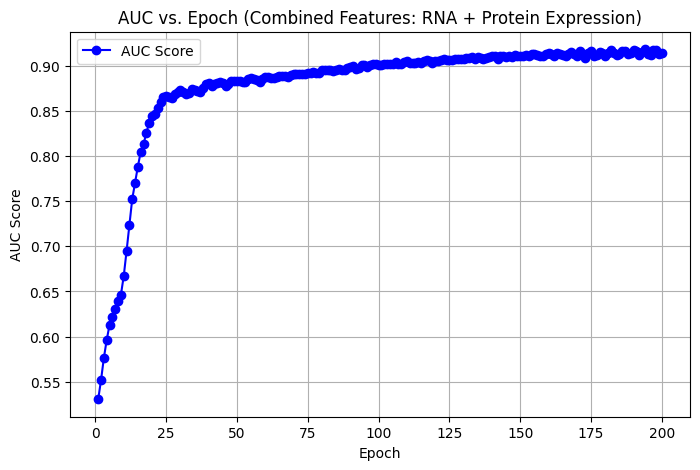

In [5]:
# Plot AUC over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(metrics_dict_combined["auc_values"]) + 1), metrics_dict_combined["auc_values"], marker='o', linestyle='-', color='b', label="AUC Score")
plt.xlabel("Epoch")
plt.ylabel("AUC Score")
plt.title("AUC vs. Epoch (Combined Features: RNA + Protein Expression)")
plt.legend()
plt.grid(True)
plt.show()

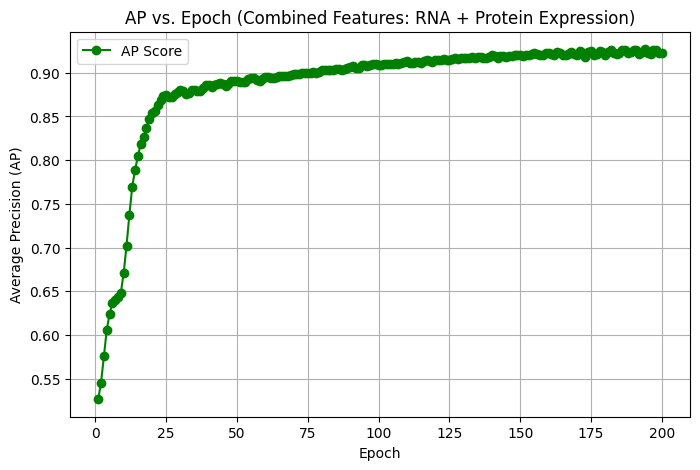

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(metrics_dict_combined["ap_values"]) + 1), metrics_dict_combined["ap_values"], marker='o', linestyle='-', color='g', label="AP Score")
plt.xlabel("Epoch")
plt.ylabel("Average Precision (AP)")
plt.title("AP vs. Epoch (Combined Features: RNA + Protein Expression)")
plt.legend()
plt.grid(True)
plt.show()

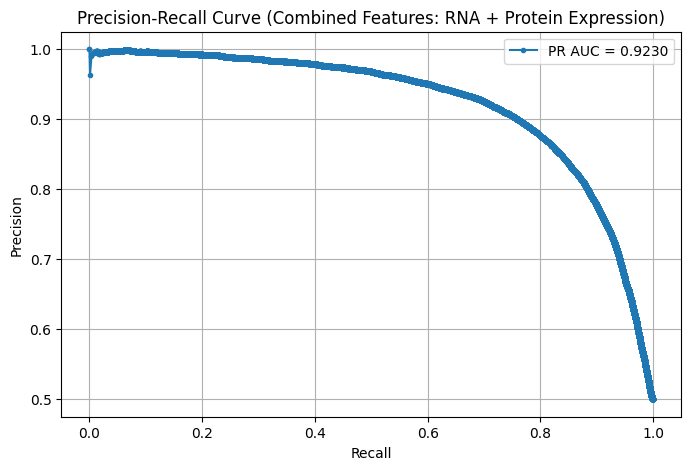

In [7]:
precision = metrics_dict_combined["precision_values"][-1]  # Last epoch's precision
recall = metrics_dict_combined["recall_values"][-1]  # Last epoch's recall
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.', label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Combined Features: RNA + Protein Expression)")
plt.legend()
plt.grid(True)
plt.show()

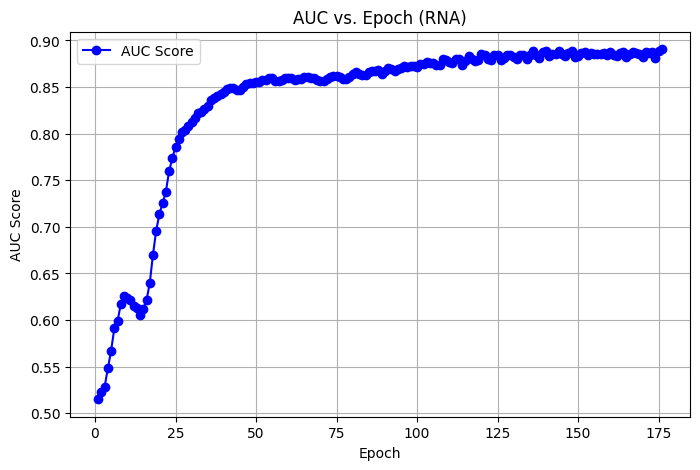

In [14]:
# Plot AUC over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(metrics_dict_rna["auc_values"]) + 1), metrics_dict_rna["auc_values"], marker='o', linestyle='-', color='b', label="AUC Score")
plt.xlabel("Epoch")
plt.ylabel("AUC Score")
plt.title("AUC vs. Epoch (RNA)")
plt.legend()
plt.grid(True)
plt.show()

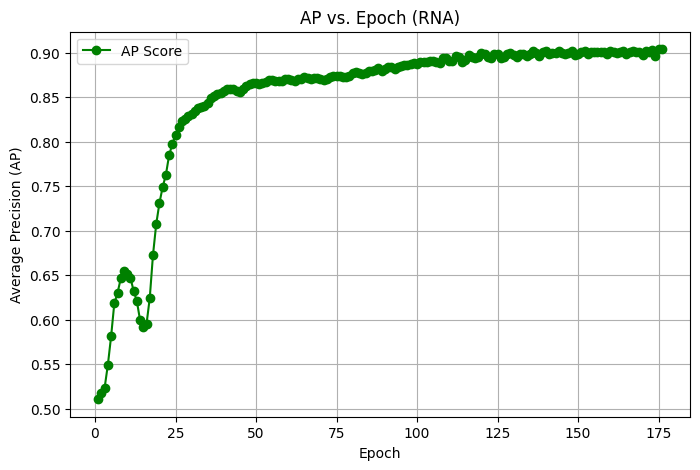

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(metrics_dict_rna["ap_values"]) + 1), metrics_dict_rna["ap_values"], marker='o', linestyle='-', color='g', label="AP Score")
plt.xlabel("Epoch")
plt.ylabel("Average Precision (AP)")
plt.title("AP vs. Epoch (RNA)")
plt.legend()
plt.grid(True)
plt.show()

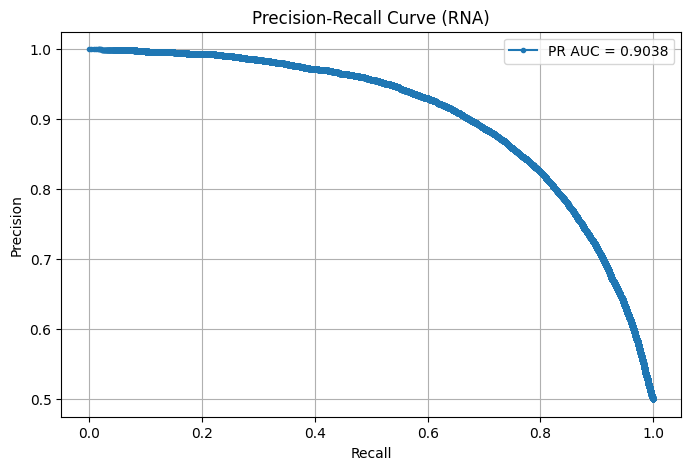

In [16]:
precision = metrics_dict_rna["precision_values"][-1]  # Last epoch's precision
recall = metrics_dict_rna["recall_values"][-1]  # Last epoch's recall
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.', label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (RNA)")
plt.legend()
plt.grid(True)
plt.show()

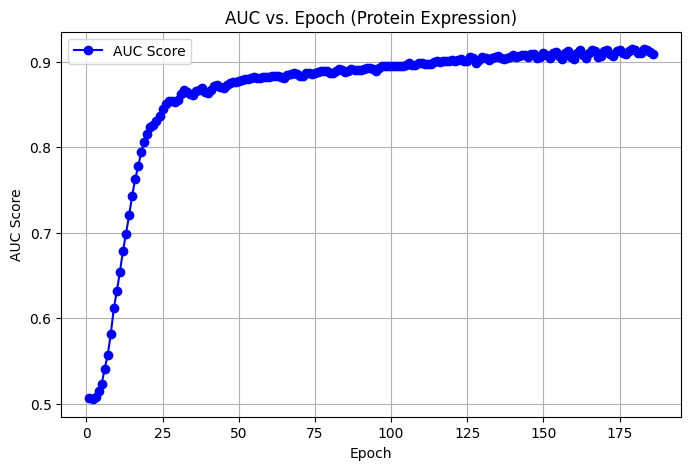

In [17]:
# Plot AUC over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(metrics_dict_pe["auc_values"]) + 1), metrics_dict_pe["auc_values"], marker='o', linestyle='-', color='b', label="AUC Score")
plt.xlabel("Epoch")
plt.ylabel("AUC Score")
plt.title("AUC vs. Epoch (Protein Expression)")
plt.legend()
plt.grid(True)
plt.show()

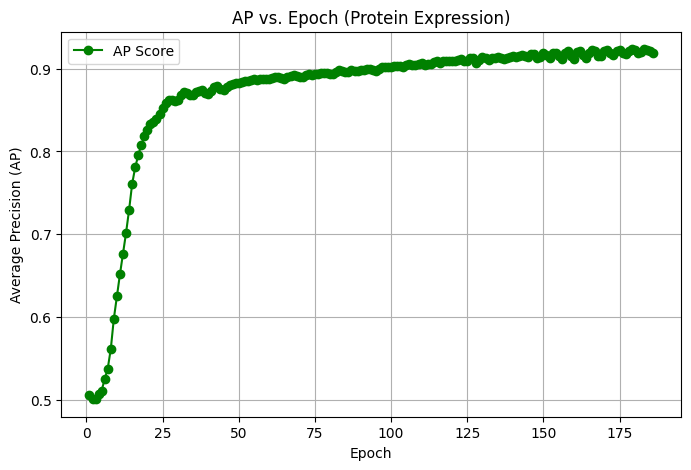

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(metrics_dict_pe["ap_values"]) + 1), metrics_dict_pe["ap_values"], marker='o', linestyle='-', color='g', label="AP Score")
plt.xlabel("Epoch")
plt.ylabel("Average Precision (AP)")
plt.title("AP vs. Epoch (Protein Expression)")
plt.legend()
plt.grid(True)
plt.show()

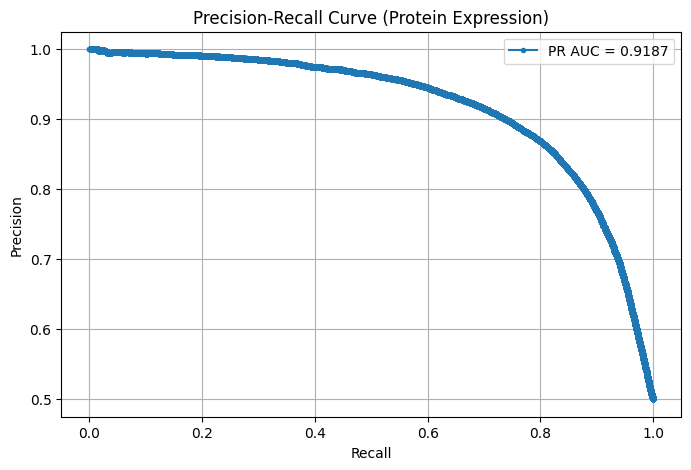

In [19]:
precision = metrics_dict_pe["precision_values"][-1]  # Last epoch's precision
recall = metrics_dict_pe["recall_values"][-1]  # Last epoch's recall
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.', label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Protein Expression)")
plt.legend()
plt.grid(True)
plt.show()